In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
import codecs
import csv

[nltk_data] Downloading package stopwords to C:\Users\Soumapriyo
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Soumapriyo
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:
from xgboost import XGBClassifier

In [138]:
train=pd.read_csv('train.csv')

In [ ]:
train.head()

In [ ]:
print(train.isnull().sum())

In [139]:
train =train.dropna(subset=['text'])

In [140]:
train=train.fillna('')
train['news']=train['title']+' '+train['author']+' '+train['text']

In [141]:
def preprocess_text(text):
    lemmatizer=WordNetLemmatizer()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and non-word characters
    words = nltk.word_tokenize(text.lower())  # Tokenization and lowercase conversion
    stop_words = set(stopwords.words('english'))
    stop_words.discard('no')  # Remove 'no' from the set of stopwords
    stop_words.discard('not')  # Remove 'not' from the set of stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Stopwords removal and lemmatization
    return ' '.join(words)

In [143]:
train['news'] = train['news'].apply(preprocess_text)

In [144]:
train.head()

,id,title,author,text,label,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired consortiumnewscom truth ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilian killed single u airstrike identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...


In [228]:
train.shape

(20761, 6)

In [234]:
X=train['news'].values
Y=train['label'].values

In [237]:
train.shape

(20761, 6)

In [233]:
train[['news','label']].to_csv("New_train.csv")

In [147]:
X[5]

'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart daniel nussbaum trying time jackie mason voice reason week exclusive clip breitbart news jackie discus looming threat north korea explains president donald trump could win support hollywood left u need strike first decides bomb whole country behind everybody realize no choice thing jackie say except hollywood left theyll get nauseous trump could win left theyll fall love minute bombed better reason jackie explains like no transgender toilet jackie also say no surprise hollywood celebrity didnt support trump strike syrian airfield month infuriated say might save life doesnt mean anything saved environment climate change theyd happiest people world still jackie say got nothing hollywood celebs theyve got tough life country watch jackies latest clip follow daniel nussbaum twitter dznussbaum'

In [148]:
Y[5]

0

In [230]:
tfid_x_train.shape

(14532, 163867)

In [239]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

In [240]:
tfvect = TfidfVectorizer(max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_val)

In [241]:
tfid_x_train.shape

(14532, 163867)

Validation Accuracy: 0.9797720340343554
Test F1 Score: 0.9796774193548388



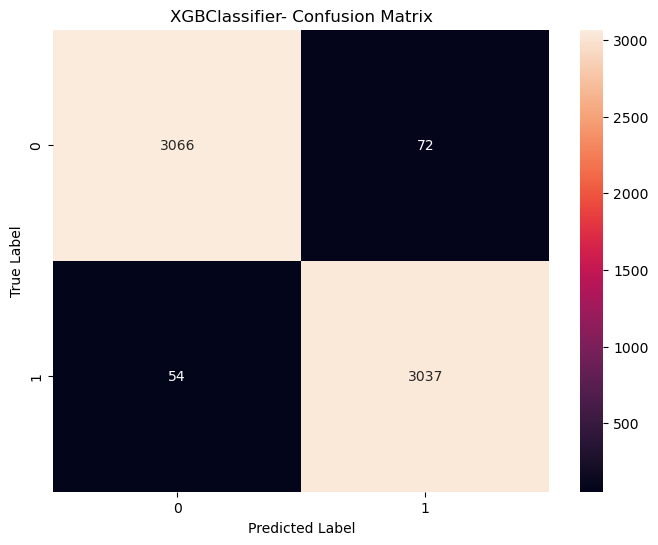

In [152]:
hyperparameters = {
    'subsample': 0.8,
    'n_estimators': 250,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.3,
    'gamma': 0.1,
    'colsample_bytree': 0.8,
    'booster': 'gbtree'
}

# Initialize the XGBoost model
model = XGBClassifier(**hyperparameters)

# Train the model on the training data
model.fit(tfid_x_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(tfid_x_test)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_pred)
test_f1_score = f1_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print("Test F1 Score:", test_f1_score)
cm = confusion_matrix(y_val, y_pred)
print()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("XGBClassifier- Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



## Pickle FIle

In [222]:
import pickle
pickle.dump(model,open('model.pkl', 'wb'))

In [223]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [221]:
def preprocess_text(text):
    lemmatizer=WordNetLemmatizer()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and non-word characters
    words = nltk.word_tokenize(text.lower())  # Tokenization and lowercase conversion
    stop_words = set(stopwords.words('english'))
    stop_words.discard('no')  # Remove 'no' from the set of stopwords
    stop_words.discard('not')  # Remove 'not' from the set of stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Stopwords removal and lemmatization
    return ' '.join(words)

In [226]:
def fake_news_det1(news):
    input_data=preprocess_text(news)
    input_data = [input_data]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)[0]
    get_message = lambda x: "FAKE News" if x == 0 else "REAL News"
    print(get_message(prediction))

In [227]:
fake_news_det1("Earth is flat and going to end in 2012")

REAL News
